In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dropout

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
import os.path

In [6]:
from tensorflow.keras.models import load_model

In [7]:
from pickle import dump

In [8]:
from pickle import load

# Import

In [24]:
df = pd.read_csv("Data/clean_data_with_features.csv", index_col= 0)

In [25]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay),Month,Year
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,1,1,0,5,2021
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141729,99900,New,Peugeot,2008,2020,5.0,130.0,1200.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
141819,36900,Used,Peugeot,2008,2014,136000.0,92.0,1600.0,Diesel,Front wheels,...,0,0,0,1,0,0,0,0,4,2021
141829,18800,Used,Peugeot,2008,2018,23728.0,100.0,1560.0,Diesel,Front wheels,...,0,1,0,0,0,0,0,0,4,2021
141841,57900,Used,Peugeot,2008,2016,59900.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021


# Just Volks...

In [12]:
volkswagen = df[df["Vehicle_brand"] == "Volkswagen"]

In [13]:
volkswagen = volkswagen[volkswagen["Price"] < 100000]

In [14]:
volkswagen_dum = pd.get_dummies(volkswagen,drop_first=True)

In [16]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9800,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,13800,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,11500,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [15]:
volkswagen_dum

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_model_CC,Vehicle_model_Caddy,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
186691,7500,2003,281000.0,105.0,1598.0,5.0,19.210461,1,0,0,...,0,0,0,0,0,0,1,0,0,0
186692,14900,2010,340000.0,105.0,1600.0,5.0,24.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
186693,21000,2010,158217.0,160.0,1390.0,5.0,17.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
186694,19999,2008,169000.0,102.0,1595.0,5.0,26.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
186695,28000,2013,138560.0,105.0,1598.0,5.0,23.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185942,5900,2005,179632.0,68.0,1200.0,3.0,11.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
185943,7999,2009,190000.0,70.0,1422.0,3.0,8.000000,1,0,0,...,0,0,0,0,1,0,0,0,0,0
185944,9500,2004,134000.0,80.0,1398.0,3.0,16.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = volkswagen_dum.drop("Price",axis = 1)

In [15]:
y = volkswagen_dum["Price"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
model = Sequential()

model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [17]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=25)

Epoch 1/25
94/94 [==============================] - 1s 5ms/step - loss: 27779.4551 - val_loss: 12351.6055
Epoch 2/25
94/94 [==============================] - 0s 3ms/step - loss: 9045.1816 - val_loss: 7245.4194
Epoch 3/25
94/94 [==============================] - 0s 3ms/step - loss: 6368.3867 - val_loss: 5598.9375
Epoch 4/25
94/94 [==============================] - 0s 3ms/step - loss: 5462.9458 - val_loss: 5180.6133
Epoch 5/25
94/94 [==============================] - 0s 3ms/step - loss: 5077.1807 - val_loss: 4877.5181
Epoch 6/25
94/94 [==============================] - 0s 3ms/step - loss: 4836.5503 - val_loss: 4853.7339
Epoch 7/25
94/94 [==============================] - 0s 3ms/step - loss: 4733.7422 - val_loss: 4704.5312
Epoch 8/25
94/94 [==============================] - 0s 3ms/step - loss: 4691.5576 - val_loss: 4595.0322
Epoch 9/25
94/94 [==============================] - 0s 3ms/step - loss: 4535.8760 - val_loss: 4640.9917
Epoch 10/25
94/94 [==============================] - 0s 3ms/st

# Separating brands turned out to be pointless

# Get dummies

In [26]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay),Month,Year
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,1,1,0,5,2021
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141729,99900,New,Peugeot,2008,2020,5.0,130.0,1200.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
141819,36900,Used,Peugeot,2008,2014,136000.0,92.0,1600.0,Diesel,Front wheels,...,0,0,0,1,0,0,0,0,4,2021
141829,18800,Used,Peugeot,2008,2018,23728.0,100.0,1560.0,Diesel,Front wheels,...,0,1,0,0,0,0,0,0,4,2021
141841,57900,Used,Peugeot,2008,2016,59900.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021


In [27]:
df_dum = pd.get_dummies(df,drop_first=True)

# Split and Scale Data

In [36]:
X = df_dum.drop(["Price"], axis = 1)

In [37]:
y = df_dum["Price"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [39]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

# DeepLearning

# All price Cars

In [ ]:
#Develop mode with Features Columns

In [42]:
X.head(1)

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,ABS,Electricfrontwindows,Driversairbag,Powersteering,ASR(tractioncontrol),...,Offer_publication_date_24/04/2021,Offer_publication_date_25/04/2021,Offer_publication_date_26/04/2021,Offer_publication_date_27/03/2021,Offer_publication_date_27/04/2021,Offer_publication_date_28/03/2021,Offer_publication_date_28/04/2021,Offer_publication_date_29/04/2021,Offer_publication_date_30/04/2021,Offer_publication_date_31/03/2021
116465,2015,125000.0,136.0,1598.0,5.0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
model = Sequential()
model.add(Dense(250,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [74]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=1024,epochs=50)

Epoch 1/50
93/93 [==============================] - 7s 37ms/step - loss: 38955.3555 - val_loss: 19190.7031
Epoch 2/50
93/93 [==============================] - 3s 33ms/step - loss: 15322.0762 - val_loss: 12780.2588
Epoch 3/50
93/93 [==============================] - 2s 17ms/step - loss: 11670.6816 - val_loss: 10199.3506
Epoch 4/50
93/93 [==============================] - 2s 17ms/step - loss: 9333.1826 - val_loss: 8282.4238
Epoch 5/50
93/93 [==============================] - 2s 16ms/step - loss: 7789.0073 - val_loss: 7209.8052
Epoch 6/50
93/93 [==============================] - 2s 18ms/step - loss: 7026.2861 - val_loss: 6809.4258
Epoch 7/50
93/93 [==============================] - 2s 17ms/step - loss: 6603.3926 - val_loss: 6615.6226
Epoch 8/50
93/93 [==============================] - 2s 17ms/step - loss: 6305.2173 - val_loss: 6282.3184
Epoch 9/50
93/93 [==============================] - 2s 17ms/step - loss: 6132.4478 - val_loss: 6374.6118
Epoch 10/50
93/93 [==============================

In [71]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

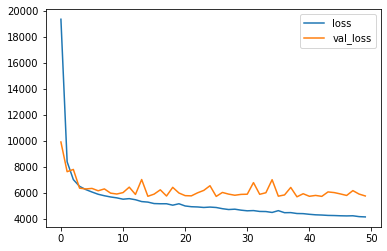

In [72]:
losses.plot()

In [75]:
5788.0859 / y_test.mean()

0.11243465465890819

In [ ]:
#5657.5508

In [ ]:
# 10k,25k,50k,100k,200k,500k,1000k

# Function to testing models

In [35]:
def test(X_train,y_train,X_test,y_test):
    n_layers = round(len(X_train[0])/120)
    neurons = round(len(X_train[0])/6)
    score = []
    
    for j in range(1,5):
        model = Sequential()
        for i in range(0,n_layers*j):
            model.add(Dense(neurons*j,activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam',loss='mae')
        model.fit(x=X_train,y=y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,epochs=5)
        preds = model.predict(X_test)
        
        score.append("Number of Layers : " + str(n_layers*j))
        score.append("Number of neurons by Layer : " + str(neurons*j))
        score.append(mean_absolute_error(y_test,preds)) 
    print(score)
    return score
    

In [36]:
score = test(X_train,y_train,X_test,y_test)

Epoch 1/5
972/972 [==============================] - 2s 2ms/step - loss: 20899.5879 - val_loss: 10167.4336
Epoch 2/5
972/972 [==============================] - 2s 2ms/step - loss: 8656.4492 - val_loss: 7789.6904
Epoch 3/5
972/972 [==============================] - 2s 2ms/step - loss: 7298.5562 - val_loss: 7139.5269
Epoch 4/5
972/972 [==============================] - 2s 2ms/step - loss: 6827.2612 - val_loss: 6807.1885
Epoch 5/5
1667/1667 [==============================] - 2s 960us/step
Epoch 1/5
972/972 [==============================] - 4s 4ms/step - loss: 11594.3633 - val_loss: 7197.0825
Epoch 2/5
972/972 [==============================] - 3s 3ms/step - loss: 6712.7646 - val_loss: 6800.8896
Epoch 3/5
972/972 [==============================] - 3s 3ms/step - loss: 6407.5479 - val_loss: 6611.7358
Epoch 4/5
972/972 [==============================] - 3s 3ms/step - loss: 6276.7988 - val_loss: 6379.4102
Epoch 5/5
1667/1667 [==============================] - 2s 1ms/step
Epoch 1/5
972/972 [==

In [291]:
score

['Number of Layers : 3',
 'Number of neurons by Layer : 60',
 4745.423315321655,
 'Number of Layers : 6',
 'Number of neurons by Layer : 120',
 4658.609052938467,
 'Number of Layers : 9',
 'Number of neurons by Layer : 180',
 4726.407577611303,
 'Number of Layers : 12',
 'Number of neurons by Layer : 240',
 5646.325984682246]

In [292]:
# 6 leyers with 120 neurons

# Flexible model1

In [37]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [38]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
972/972 [==============================] - 4s 4ms/step - loss: 11835.5488 - val_loss: 7253.6240
Epoch 2/100
972/972 [==============================] - 3s 3ms/step - loss: 6763.7114 - val_loss: 6564.7935
Epoch 3/100
972/972 [==============================] - 3s 3ms/step - loss: 6463.5137 - val_loss: 6426.8101
Epoch 4/100
972/972 [==============================] - 3s 3ms/step - loss: 6278.0190 - val_loss: 6360.0757
Epoch 5/100
972/972 [==============================] - 3s 3ms/step - loss: 6154.7148 - val_loss: 6176.1909
Epoch 6/100
972/972 [==============================] - 3s 3ms/step - loss: 6078.6509 - val_loss: 6187.8003
Epoch 7/100
972/972 [==============================] - 3s 3ms/step - loss: 6039.6436 - val_loss: 6125.9917
Epoch 8/100
972/972 [==============================] - 3s 3ms/step - loss: 5930.6763 - val_loss: 6054.4458
Epoch 9/100
972/972 [==============================] - 3s 4ms/step - loss: 5894.3931 - val_loss: 6006.3960
Epoch 10/100
972/972 [==============

Epoch 77/100
972/972 [==============================] - 3s 3ms/step - loss: 4848.5469 - val_loss: 5584.8350
Epoch 78/100
972/972 [==============================] - 3s 3ms/step - loss: 4824.4253 - val_loss: 5603.6016
Epoch 79/100
972/972 [==============================] - 3s 3ms/step - loss: 4836.0527 - val_loss: 5616.0972
Epoch 80/100
972/972 [==============================] - 3s 3ms/step - loss: 4826.5605 - val_loss: 5630.3584
Epoch 81/100
972/972 [==============================] - 3s 3ms/step - loss: 4815.0967 - val_loss: 5641.3716
Epoch 82/100
972/972 [==============================] - 3s 3ms/step - loss: 4797.0112 - val_loss: 5625.4058
Epoch 83/100
972/972 [==============================] - 3s 3ms/step - loss: 4797.3911 - val_loss: 5537.8281
Epoch 84/100
972/972 [==============================] - 3s 3ms/step - loss: 4797.8184 - val_loss: 5547.6909
Epoch 85/100
972/972 [==============================] - 3s 3ms/step - loss: 4773.6069 - val_loss: 5713.8877
Epoch 86/100
972/972 [======

In [301]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

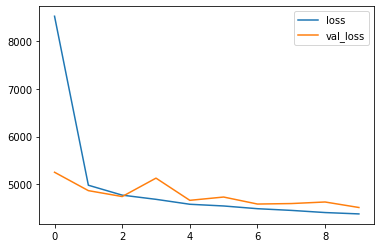

In [302]:
losses.plot()

In [18]:
preds = model.predict(X_test)

1667/1667 [==============================] - 2s 1ms/step


In [19]:
mean_absolute_error(y_test,preds) 

6076.456504081159

In [20]:
preds_df = pd.DataFrame(preds)

In [21]:
y_df = pd.DataFrame(y_test.values)

In [22]:
preds_df

,0
0,31369.828125
1,72350.062500
2,17001.167969
3,50897.496094
4,133630.000000
...,...
53315,25025.771484
53316,29652.050781
53317,23476.349609
53318,106400.578125


In [23]:
y_df

,0
0,29900
1,65500
2,14800
3,48000
4,121494
...,...
53315,26900
53316,27900
53317,20600
53318,89990


In [24]:
pd.concat([preds_df,y_df],axis = 1, ignore_index=True,join = "outer")

,0,1
0,31369.828125,29900
1,72350.062500,65500
2,17001.167969,14800
3,50897.496094,48000
4,133630.000000,121494
...,...,...
53315,25025.771484,26900
53316,29652.050781,27900
53317,23476.349609,20600
53318,106400.578125,89990


# Cars 100k max

In [25]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

In [26]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9800,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,13800,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,11500,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [27]:
df_100k = df[df["Price"] < 100000]

In [28]:
df_dum = pd.get_dummies(df_100k,drop_first=True)

In [29]:
X = df_dum.drop(["Price"], axis = 1)

In [30]:
y = df_dum["Price"]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110)

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

# Main model start

In [278]:
df.columns


Index(['Price', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Doors_number', 'Colour',
       'Features'],
      dtype='object')

In [268]:
df_dum = pd.get_dummies(df)

In [269]:
X = df_dum.drop(["Price"], axis = 1)

In [270]:
y = df_dum["Price"]

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110)

In [272]:
X_train = scaler.fit_transform(X_train)

In [273]:
X_test = scaler.transform(X_test)

In [274]:
dump(scaler, open('Scalers/scaler_app.pkl', 'wb'))

In [277]:
X_test.shape

(17774, 370)

In [214]:
from tensorflow.keras.optimizers import SGD

In [215]:
model = Sequential()
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [216]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=10)

Epoch 1/10
625/625 [==============================] - 5s 6ms/step - loss: 13693.7939 - val_loss: 7045.6157
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 6703.0078 - val_loss: 6518.1372
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 6291.1348 - val_loss: 6217.7812
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 6182.0469 - val_loss: 6103.6890
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 6066.8013 - val_loss: 6037.8848
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 5943.2676 - val_loss: 6183.2334
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 5876.2734 - val_loss: 5967.7432
Epoch 8/10
625/625 [==============================] - 4s 6ms/step - loss: 5841.1411 - val_loss: 5995.3799
Epoch 9/10
625/625 [==============================] - 4s 6ms/step - loss: 5781.8521 - val_loss: 6155.0015
Epoch 10/10
625/625 [========================

In [217]:
preds = model.predict(X_test)

556/556 [==============================] - 1s 2ms/step


In [218]:
y_test_df = pd.DataFrame(y_test)

In [219]:
preds_df = pd.DataFrame(preds)

In [220]:
preds_df.reset_index

<bound method DataFrame.reset_index of                    0
0       28414.380859
1       69894.351562
2       11990.083984
3       50312.265625
4      136883.437500
...              ...
17769   47434.171875
17770   16801.523438
17771   32324.576172
17772  142612.671875
17773   88256.929688

[17774 rows x 1 columns]>

In [221]:
y_test_df.reset_index(drop = True,inplace = True)

In [222]:
preds_df.reset_index(drop = True,inplace = True)

In [223]:
score = pd.concat([y_test_df,preds_df], axis = 1,ignore_index=True)

In [224]:
score

,0,1
0,29900,28414.380859
1,65500,69894.351562
2,14800,11990.083984
3,48000,50312.265625
4,121494,136883.437500
...,...,...
17769,44500,47434.171875
17770,12000,16801.523438
17771,29900,32324.576172
17772,122877,142612.671875


# Main model End and Single Row Prediction Start

In [225]:
#[42900, 'Used', 'Opel', 'Astra', 2015, 125000.0, 136.0, 1598.0,'Diesel', 'Front wheels', 'Manual', 5.0, 'red', 48.0]

In [253]:
car_df = pd.DataFrame(data = [[42900, 'New', 'Opel', 'Astra', 2015, 125000.0, 136.0, 1598.0,'Diesel', 'Front wheels', 'Manual', 5.0, 'blue', 48.0]], columns = df.columns )

In [254]:
car_df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
0,42900,New,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,blue,48.0


In [255]:
car_dum = pd.get_dummies(car_df)

In [256]:
car_dum

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_New,Vehicle_brand_Opel,Vehicle_model_Astra,Fuel_type_Diesel,Drive_Front wheels,Transmission_Manual,Colour_blue
0,42900,2015,125000.0,136.0,1598.0,5.0,48.0,1,1,1,1,1,1,1


In [257]:
df_add = df_dum.iloc[[1,2]]

In [275]:
df_add.to_csv("Data/df_app.csv")

In [267]:
pd.read_csv("df_app.csv")

,Unnamed: 0,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_New,Condition_Used,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
0,116466,11900,2006,192547.0,140.0,1796.0,5.0,35.0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,116467,25900,2010,119000.0,115.0,1598.0,5.0,32.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,42900,2015,125000.0,136.0,1598.0,5.0,48.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
df_add = df_add.append(car_dum).fillna(0)

C:\Users\kacpe\AppData\Local\Temp/ipykernel_10268/3076344723.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_add = df_add.append(car_dum).fillna(0)


In [259]:
X_car = df_add.drop("Price", axis = 1)

In [260]:
to_pred = scaler.transform(X_car)

In [264]:
df.columns

Index(['Price', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Doors_number', 'Colour',
       'Features'],
      dtype='object')

# Single row prediction

In [261]:
car_price = model.predict(to_pred)[-1]

1/1 [==============================] - 0s 16ms/step


In [263]:
model.save("Model/model_app.h5")

In [262]:
car_price

array([53286.03], dtype=float32)

In [ ]:
#37922.22

In [73]:
flex_model = tf.keras.models.load_model("Models/model_100k_flexible.hdf5")

In [74]:
flex_model.predict(X_test)

492/492 [==============================] - 1s 1ms/step


array([[ 7628.3237],
       [ 9661.785 ],
       [22762.875 ],
       ...,
       [34224.24  ],
       [15487.659 ],
       [27871.969 ]], dtype=float32)

In [40]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

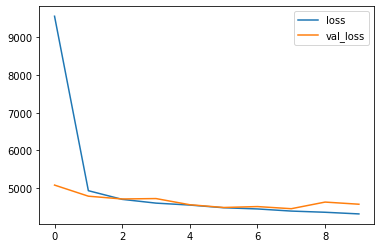

In [41]:
losses.plot()

In [42]:
preds = model.predict(X_test)

492/492 [==============================] - 1s 1ms/step


In [43]:
mean_absolute_error(y_test,preds) / y_test.mean()

0.12780784457549865

In [44]:
y_df = pd.DataFrame(y_test.values)
y_df

,0
0,7700
1,15900
2,22900
3,23500
4,74400
...,...
15730,19800
15731,36900
15732,30900
15733,13900


In [45]:
preds_df = pd.DataFrame(preds.round())
preds_df

,0
0,7504.0
1,11570.0
2,21814.0
3,21736.0
4,81777.0
...,...
15730,18104.0
15731,35907.0
15732,32245.0
15733,14841.0


In [46]:
df.drop("Price",axis = 1)

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,
116465,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [47]:
result_df = pd.concat([y_df,preds_df],axis = 1)

In [48]:
result_df.columns = ["Real Price", "Predicted Price"]

In [49]:
result_df["Difference"] = result_df["Real Price"] - result_df["Predicted Price"]
result_df["ABS Difference"] = abs(result_df["Real Price"] - result_df["Predicted Price"])

In [50]:
result_df["% of error"] = abs((result_df["Difference"]/result_df["Real Price"]) * 100).round(2)

In [51]:
result_df.head(10)

,Real Price,Predicted Price,Difference,ABS Difference,% of error
0,7700,7504.0,196.0,196.0,2.55
1,15900,11570.0,4330.0,4330.0,27.23
2,22900,21814.0,1086.0,1086.0,4.74
3,23500,21736.0,1764.0,1764.0,7.51
4,74400,81777.0,-7377.0,7377.0,9.92
5,33000,26514.0,6486.0,6486.0,19.65
6,24900,28323.0,-3423.0,3423.0,13.75
7,6900,4571.0,2329.0,2329.0,33.75
8,17200,23300.0,-6100.0,6100.0,35.47
9,7900,8874.0,-974.0,974.0,12.33


# 0k - 10K

In [52]:
result_df[(result_df["Real Price"] < 10000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] < 10000)]["Real Price"].mean()

0.30798827496578896

# 10k - 25k

In [53]:
result_df[(result_df["Real Price"] > 10000  ) & (result_df["Real Price"] < 25000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] > 10000  ) & (result_df["Real Price"] < 25000)]["Real Price"].mean()

0.15896554161061546

# 25k - 50k

In [54]:
result_df[(result_df["Real Price"] > 25000  ) & (result_df["Real Price"] < 50000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] > 25000  ) & (result_df["Real Price"] < 50000)]["Real Price"].mean()

0.12832104719162077

# 50k - 100k

In [55]:
result_df[(result_df["Real Price"] > 50000  ) & (result_df["Real Price"] < 100000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] > 50000  ) & (result_df["Real Price"] < 100000)]["Real Price"].mean()

0.10920055301390588

# I decided to train the models for these price ranges separately

In [56]:
import os
cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

Current working directory: C:\Users\kacpe\Desktop\programowanie\Programowanie_w_Python\Car_Value_Project


In [57]:
score = []

In [63]:
def model_treining(df):
    df_dummies = pd.get_dummies(df,drop_first=True)
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=100)
    preds = model.predict(X_test)
    print(mean_absolute_error(y_test,preds) / y_test.mean())
    score.append(mean_absolute_error(y_test,preds) / y_test.mean())
    plt.clf()
    plt.scatter(y_test,preds)
    
    plt.plot(y_test,y_test,'r')
    tf.keras.models.save_model(model,  "Models/model_10k.hdf5")
    #tf.keras.models.save_model(model,  name + ".hdf5")
    return model
    

# Models Real Trening to save and deploy

In [23]:
df_10k = df[df["Price"] < 10000]

In [24]:
    df_dummies = pd.get_dummies(df_10k,drop_first=True)
    df_dummies.to_csv("Data/df_dummies_10k.csv")
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
    scaler10k = StandardScaler()
    X_train = scaler10k.fit_transform(X_train)
    X_test = scaler10k.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=100)
    preds = model.predict(X_test)
    X_test.shape
    print(mean_absolute_error(y_test,preds) / y_test.mean())

Epoch 1/100
61/61 [==============================] - 1s 8ms/step - loss: 5954.3989 - val_loss: 2085.0891
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 1790.1096 - val_loss: 1515.9852
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 1476.7054 - val_loss: 1414.0381
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 1405.5369 - val_loss: 1401.8839
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 1361.5146 - val_loss: 1365.4457
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 1344.0397 - val_loss: 1333.6884
Epoch 7/100
61/61 [==============================] - 0s 4ms/step - loss: 1332.4922 - val_loss: 1330.7166
Epoch 8/100
61/61 [==============================] - 0s 4ms/step - loss: 1319.1776 - val_loss: 1328.8373
Epoch 9/100
61/61 [==============================] - 0s 4ms/step - loss: 1306.1880 - val_loss: 1316.6429
Epoch 10/100
61/61 [==============================] - 0

In [25]:
#Save model and scaler 

In [26]:
dump(scaler10k, open('Scalers/scaler10k.pkl', 'wb'))

In [27]:
model.save("Model/model_10k.h5")

In [188]:
#model_treining(df_10k)
#model_10k = tf.keras.models.load_model("Models/model_10k.hdf5")

In [189]:
df_10k["Vehicle_brand"].unique()

array(['Opel', 'Audi', 'BMW', 'Volkswagen', 'Škoda', 'Ford', 'Renault',
       'Mercedes-Benz', 'Toyota', 'Seat', 'Nissan', 'Kia', 'Hyundai',
       'Peugeot', 'Mazda', 'Honda', 'Citroën', 'Fiat', 'Volvo', 'Dacia',
       'Suzuki', 'Mitsubishi', 'Jeep', 'MINI', 'Saab', 'Alfa Romeo',
       'Chevrolet', 'Subaru', 'Jaguar', 'Lexus', 'Chrysler', 'Smart',
       'Land Rover'], dtype=object)

In [81]:
df_25k = df[(df["Price"] > 10000) & (df["Price"] < 25000)]

In [89]:
    df_dummies = pd.get_dummies(df_25k,drop_first=True)
    df_dummies.to_csv("Data/df_dummies_25k.csv")
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
    scaler25k = StandardScaler()
    X_train = scaler25k.fit_transform(X_train)
    X_test = scaler25k.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    #model.fit(x=X_train,y=y_train.values,
    #      validation_data=(X_test,y_test.values),
    #      batch_size=256,epochs=100)
    preds = model.predict(X_test)
    print(mean_absolute_error(y_test,preds) / y_test.mean())

318/318 [==============================] - 0s 1ms/step
1.0000004231705446


In [90]:
#Save model and scaler

In [92]:
model.save("Model/model_25k.h5")

In [93]:
dump(scaler25k, open('Scalers/scaler25k.pkl', 'wb'))

In [94]:
df_50k = df[(df["Price"] > 25000) & (df["Price"] < 50000)]

In [99]:
    df_dummies = pd.get_dummies(df_50k,drop_first=True)
    df_dummies.to_csv("Data/df_dummies_50k.csv")
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
    scaler50k = StandardScaler()
    X_train = scaler50k.fit_transform(X_train)
    X_test = scaler50k.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    #model.fit(x=X_train,y=y_train.values,
    #      validation_data=(X_test,y_test.values),
    #      batch_size=256,epochs=100)
    preds = model.predict(X_test)
    print(mean_absolute_error(y_test,preds) / y_test.mean())

292/292 [==============================] - 0s 1ms/step
1.0000013326566095


In [100]:
model.save("Model/model_50k.h5")

In [101]:
dump(scaler50k, open('Scalers/scaler50k.pkl', 'wb'))

In [103]:
df_100k = df[(df["Price"] > 50000) & (df["Price"] < 100000)]

In [104]:
    df_dummies = pd.get_dummies(df_100k,drop_first=True)
    df_dummies.to_csv("Data/df_dummies_100k.csv")
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
    scaler100k = StandardScaler()
    X_train = scaler100k.fit_transform(X_train)
    X_test = scaler100k.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    #model.fit(x=X_train,y=y_train.values,
    #      validation_data=(X_test,y_test.values),
    #      batch_size=256,epochs=100)
    preds = model.predict(X_test)
    print(mean_absolute_error(y_test,preds) / y_test.mean())

250/250 [==============================] - 0s 1ms/step
0.9999990622239932


In [105]:
dump(scaler100k, open('Scalers/scaler100k.pkl', 'wb'))

In [69]:
model.save("Model/model_100k.h5")

In [107]:
df_200k = df[(df["Price"] > 100000) & (df["Price"] < 200000)]
#model = model_treining(df_200k)
#tf.keras.models.save_model(model,  "Models/model_200k.hdf5")

In [109]:
    df_dummies = pd.get_dummies(df_200k,drop_first=True)
    df_dummies.to_csv("Data/df_dummies_200k.csv")
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
    scaler200k = StandardScaler()
    X_train = scaler200k.fit_transform(X_train)
    X_test = scaler200k.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    #model.fit(x=X_train,y=y_train.values,
    #      validation_data=(X_test,y_test.values),
    #      batch_size=256,epochs=100)
    preds = model.predict(X_test)
    print(mean_absolute_error(y_test,preds) / y_test.mean())

128/128 [==============================] - 0s 1ms/step
1.0000006314812917


In [110]:
model.save("Model/model_200k.h5")

In [28]:
dump(scaler200k, open('Scalers/scaler200k.pkl', 'wb'))

NameError: name 'scaler200k' is not defined

In [35]:
model_10k = load_model("Model/model_10k.h5")

In [36]:
model_25k =load_model("Model/model_25k.h5")

In [37]:
model_50k =load_model("Model/model_50k.h5")

In [38]:
model_100k = load_model("Model/model_100k.h5")

In [39]:
model_200k = load_model("Model/model_100k.h5")

In [40]:
scaler10k = load(open('Scalers/scaler10k.pkl', 'rb'))

In [41]:
scaler25k = load(open('Scalers/scaler25k.pkl', 'rb'))

In [42]:
scaler50k = load(open('Scalers/scaler50k.pkl', 'rb'))

In [43]:
scaler100k = load(open('Scalers/scaler100k.pkl', 'rb'))

In [44]:
scaler200k = load(open('Scalers/scaler200k.pkl', 'rb'))

In [232]:
car = pd.DataFrame(columns = df.columns, data = [[199000, 'Used', 'Opel', 'Astra', 2005, 235000.0, 105.0, 1598.0,
       'Gasoline + LPG', 'Front wheels', 'Manual', 5.0, 'black', 16.0]])

In [233]:
df_dum = pd.get_dummies

In [234]:
X = df.drop("Price",axis = 1)

In [237]:
if car["Price"].values[0] < 10000:
    df_10k_c = df_10k.append(car)
    df_10k_c.drop("Price",axis = 1,inplace = True)
    df_10k_c_dum = pd.get_dummies(df_10k_c,drop_first=True)
    car1 = scaler10k.transform(df_10k_c_dum.iloc[[-2,-1]])
    prediction = model_10k.predict(car1)[1]
    
elif (car["Price"].values[0] > 10000) & (car["Price"].values[0] < 25000):
    df_25k_c = df_25k.append(car)
    df_25k_c.drop("Price",axis = 1,inplace = True)
    df_25k_c_dum = pd.get_dummies(df_25k_c,drop_first=True)
    car1 = scaler25k.transform(df_25k_c_dum.iloc[[-2,-1]])
    prediction = model_25k.predict(car1)[1]
elif (car["Price"].values[0] > 25000) & (car["Price"].values[0] < 50000):
    df_50k_c = df_50k.append(car)
    df_50k_c.drop("Price",axis = 1,inplace = True)
    df_50k_c_dum = pd.get_dummies(df_50k_c,drop_first=True)
    car1 = scaler50k.transform(df_50k_c_dum.iloc[[-2,-1]])
    prediction = model_50k.predict(car1)[1]
elif (car["Price"].values[0] > 50000) & (car["Price"].values[0] < 100000):
    df_100k_c = df_100k.append(car)
    df_100k_c.drop("Price",axis = 1,inplace = True)
    df_100k_c_dum = pd.get_dummies(df_100k_c,drop_first=True)
    car1 = scaler100k.transform(df_100k_c_dum.iloc[[-2,-1]])
    prediction = model_100k.predict(car1)[1]
elif (car["Price"].values[0] > 100000) & (car["Price"].values[0] < 200000):
    df_200k_c = df_200k.append(car)
    df_200k_c.drop("Price",axis = 1,inplace = True)
    df_200k_c_dum = pd.get_dummies(df_200k_c,drop_first=True)
    car1 = scaler200k.transform(df_200k_c_dum.iloc[[-2,-1]])
    prediction = model_200k.predict(car1)[1]

C:\Users\kacpe\AppData\Local\Temp/ipykernel_19776/2895465081.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_200k_c = df_200k.append(car)


ValueError: in user code:

    File "c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 320), found shape=(None, 249)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [216]:
model_25k = load_model("Model/model_25k.h5")

In [217]:
df_dummies_25k = pd.read_csv("Data/df_dummies_25k.csv", index_col=  "Index")

In [209]:
model_50k = load_model("Model/model_50k.h5")

In [218]:
df_dummies_50k = pd.read_csv("Data/df_dummies_50k.csv", index_col=  "Index")
df_dummies_50k.head()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116465,42900,2015,125000.0,136.0,1598.0,5.0,48.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
116467,25900,2010,119000.0,115.0,1598.0,5.0,32.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116472,25900,2013,125000.0,100.0,1398.0,5.0,41.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
116478,37500,2017,196000.0,110.0,1598.0,5.0,30.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
116485,34999,2014,146141.0,140.0,1364.0,5.0,33.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [219]:
model_100k = load_model("Model/model_100k.h5")
df_dummies_100k = pd.read_csv("Data/df_dummies_100k.csv", index_col=  "Index")
df_dummies_100k.head()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116476,54900,2018,65055.0,110.0,1598.0,5.0,36.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
116481,55000,2012,184000.0,280.0,1998.0,3.0,31.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116482,52000,2017,22300.0,115.0,1598.0,5.0,34.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
116484,71200,2018,67499.0,150.0,1399.0,5.0,42.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
116489,55000,2018,48336.0,125.0,1399.0,5.0,22.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [220]:
model_200k = load_model("Model/model_200k.h5")
df_dummies_200k = pd.read_csv("Data/df_dummies_200k.csv", index_col=  "Index")
df_dummies_200k.head()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Audi,Vehicle_brand_BMW,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
119069,130000,2018,1560.0,280.0,1998.0,3.0,44.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4490,154699,2021,10.0,150.0,1984.0,5.0,37.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4507,145900,2019,28000.0,150.0,1968.0,4.0,38.000000,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4518,109900,2019,6645.0,190.0,1984.0,5.0,52.000000,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4539,122000,2020,7.0,150.0,1984.0,5.0,32.729672,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Second Attempt


In [55]:
X_dum = pd.get_dummies(df)

In [56]:
X1 = X_dum.drop("Price", axis = 1)

In [57]:
X1

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_New,Condition_Used,Vehicle_brand_Abarth,Vehicle_brand_Alfa Romeo,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116465,2015,125000.0,136.0,1598.0,5.0,48.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
116466,2006,192547.0,140.0,1796.0,5.0,35.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
116467,2010,119000.0,115.0,1598.0,5.0,32.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116468,2007,290000.0,100.0,1910.0,5.0,25.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
116469,2008,168779.0,115.0,1598.0,5.0,24.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,2010,200000.0,68.0,995.0,5.0,21.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
36981,2012,112644.0,68.0,1000.0,5.0,19.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36984,2011,126000.0,68.0,995.0,5.0,7.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df["Price"]

In [59]:
scaler = StandardScaler()

In [64]:
scaler_flex = scaler.fit(X1)

In [ ]:
#42900

In [120]:
df.iloc[0].values

array([42900, 'Used', 'Opel', 'Astra', 2015, 125000.0, 136.0, 1598.0,
       'Diesel', 'Front wheels', 'Manual', 5.0, 'red', 48.0], dtype=object)

In [121]:
car = pd.DataFrame(columns = df.columns, data = [df.iloc[0].values])

In [141]:
def model_treining(df,name,car):
    df = pd.get_dummies(df,drop_first=True)
    df = df.append(car)
    if name == "10k":
        df = df[df["Price"] < 10000]
    elif name == "25k":
        df = df[(df["Price"] > 10000) & (df["Price"] < 25000)]
    elif name == "50k":
        df = df[(df["Price"] > 25000) & (df["Price"] < 50000)]
    elif name =="100k":
        df = df[(df["Price"] > 50000) & (df["Price"] < 100000)]
    elif name == "200k":
        df = df[(df["Price"] > 100000) & (df["Price"] < 200000)]
    df_dum10k = df
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=10)
    preds = model.predict(X_test)
    print(mean_absolute_error(y_test,preds) / y_test.mean())
    #score.append(mean_absolute_error(y_test,preds) / y_test.mean())
    plt.clf()
    plt.scatter(y_test,preds)
    
    plt.plot(y_test,y_test,'r')
    model.save("Models/model_" +name + ".h5")

    return df_dum10k, preds[-1]

C:\Users\kacpe\AppData\Local\Temp/ipykernel_10268/1096286829.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(car)


Epoch 1/10
61/61 [==============================] - 1s 7ms/step - loss: 6042.0576 - val_loss: 2343.1133
Epoch 2/10
61/61 [==============================] - 0s 5ms/step - loss: 1790.9000 - val_loss: 1548.8718
Epoch 3/10
61/61 [==============================] - 0s 5ms/step - loss: 1492.5311 - val_loss: 1442.8864
Epoch 4/10
61/61 [==============================] - 0s 5ms/step - loss: 1413.1193 - val_loss: 1392.4724
Epoch 5/10
61/61 [==============================] - 0s 5ms/step - loss: 1365.5427 - val_loss: 1361.3601
Epoch 6/10
61/61 [==============================] - 0s 5ms/step - loss: 1338.8765 - val_loss: 1356.8586
Epoch 7/10
61/61 [==============================] - 0s 5ms/step - loss: 1323.2778 - val_loss: 1343.1445
Epoch 8/10
61/61 [==============================] - 0s 5ms/step - loss: 1311.0385 - val_loss: 1331.2534
Epoch 9/10
61/61 [==============================] - 0s 5ms/step - loss: 1304.3724 - val_loss: 1323.4054
Epoch 10/10
121/121 [==============================] - 0s 1ms/st

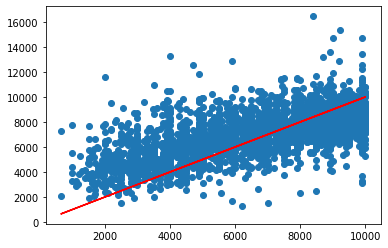

In [143]:
df_dum10k, car1  = model_treining(df,"10k",car)

In [144]:
car1

array([9821.587], dtype=float32)

In [140]:
model_10k =load_model("Model/model_10k.h5")

In [99]:
df_dum10k

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116468,8400,2007,290000.0,100.0,1910.0,5.0,25.000000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
116470,8300,2006,180000.0,90.0,1364.0,5.0,7.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116471,9900,2005,235000.0,105.0,1598.0,5.0,16.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116474,7500,2002,130000.0,125.0,1796.0,2.0,17.864323,1,0,0,...,0,0,0,0,0,1,0,0,0,0
116479,2990,2001,289000.0,85.0,1598.0,5.0,16.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36613,9999,2011,165000.0,68.0,995.0,5.0,9.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36693,9900,2010,160000.0,81.0,1206.0,5.0,11.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,0
36864,9700,2010,138000.0,68.0,995.0,5.0,8.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X_test.shape

(3850, 264)

In [102]:
car = pd.DataFrame(columns = df.columns, data = [[199000, 'Used', 'Opel', 'Astra', 2005, 235000.0, 105.0, 1598.0,
       'Gasoline + LPG', 'Front wheels', 'Manual', 5.0, 'black', 16.0]])

In [101]:
model_10k.predict(X_test)

121/121 [==============================] - 0s 1ms/step


array([[5537.869 ],
       [6376.707 ],
       [4175.9707],
       ...,
       [8504.751 ],
       [4987.7515],
       [5022.2896]], dtype=float32)